In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
data = pd.read_csv('weather_history.csv')

In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
data.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [5]:
data.shape

(1461, 6)

In [6]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

**Preparing data for training the model**

In [7]:
data['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [8]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
data.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

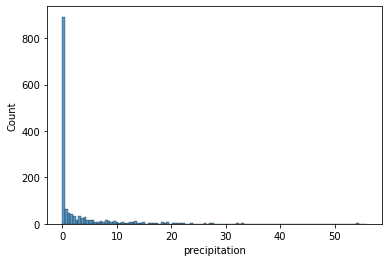

In [11]:
sns.histplot(data.precipitation)

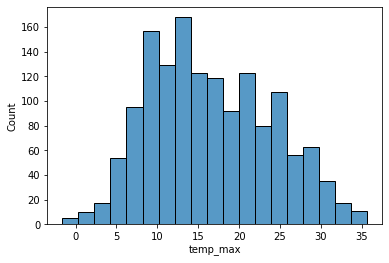

In [12]:
sns.histplot(data.temp_max)

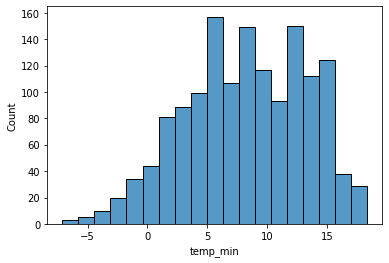

In [13]:
sns.histplot(data.temp_min)

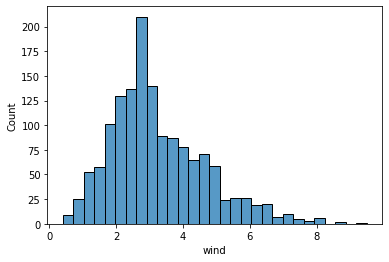

In [14]:
sns.histplot(data.wind)

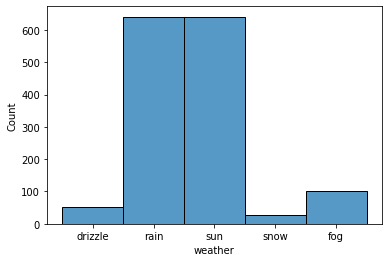

In [15]:
sns.histplot(data.weather)

In [16]:
# Converting categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['weather']=le.fit_transform(data['weather'])

In [17]:
data['weather'].value_counts()

2    641
4    640
1    101
0     53
3     26
Name: weather, dtype: int64

In [18]:
y = data.iloc[:,-1] # Target column

In [19]:
x = data.iloc[:,0:-2]    #Independent variable

In [20]:
x.head()

,date,precipitation,temp_max,temp_min
0,2012-01-01,0.0,12.8,5.0
1,2012-01-02,10.9,10.6,2.8
2,2012-01-03,0.8,11.7,7.2
3,2012-01-04,20.3,12.2,5.6
4,2012-01-05,1.3,8.9,2.8


In [21]:
x.shape

(1461, 4)

In [22]:
# Splitting the dataset into train data and test data
# Train dataset is 70% of and Test dataset is 30% of original dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [23]:
x_train.shape

(1022, 4)

In [24]:
x_test.shape

(439, 4)

In [25]:
import datetime
x_train['day'] = x_train['date'].dt.day
x_train['month'] = x_train['date'].dt.month
x_train['year'] = x_train['date'].dt.year

In [26]:
x_test['day'] = x_test['date'].dt.day
x_test['month'] = x_test['date'].dt.month
x_test['year'] = x_test['date'].dt.year

In [27]:
x_train.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
day                       int64
month                     int64
year                      int64
dtype: object

In [28]:
x_train.corr()

,precipitation,temp_max,temp_min,day,month,year
precipitation,1.000000,-0.223398,-0.066845,0.026535,0.045538,0.014607
temp_max,-0.223398,1.000000,0.882716,-0.060351,0.141705,0.125204
temp_min,-0.066845,0.882716,1.000000,-0.023699,0.201312,0.128612
day,0.026535,-0.060351,-0.023699,1.000000,0.045791,0.007967
month,0.045538,0.141705,0.201312,0.045791,1.000000,0.020316
year,0.014607,0.125204,0.128612,0.007967,0.020316,1.000000


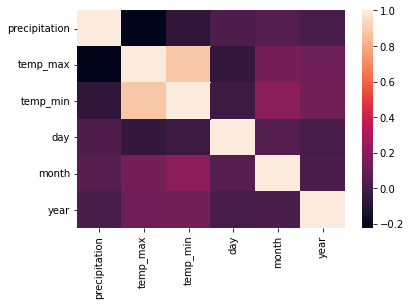

In [29]:
sns.heatmap(x_train.corr())

In [30]:
x_train.drop('date', axis=1, inplace =True)

In [31]:
x_test.drop('date', axis=1, inplace =True)

In [32]:
# Using Random Forest Classifier algorithm to predict the weather
# Training model on test data

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
RF.fit(x_train,y_train)

# Prediction
y_pred_rf = RF.predict(x_test)

In [33]:
print(y_pred_rf)

[4 4 2 4 2 2 4 2 2 2 4 4 4 4 2 4 4 4 4 1 2 4 4 2 2 4 2 2 2 4 4 2 4 2 4 4 4
 4 2 4 4 4 4 4 2 2 4 4 2 2 4 4 2 2 4 2 4 2 4 4 4 4 2 2 2 2 2 4 4 4 2 4 4 2
 4 2 2 2 2 4 4 4 2 2 4 2 4 4 4 2 4 4 4 4 2 4 4 4 2 4 4 4 4 2 2 4 4 2 4 4 4
 2 4 2 4 4 4 2 4 4 4 2 2 4 2 2 2 4 2 4 2 2 4 2 4 4 2 4 0 4 2 4 2 4 2 2 4 4
 2 2 4 2 2 4 1 4 4 4 2 4 2 4 2 4 2 4 4 4 4 4 1 2 4 2 2 2 4 2 4 2 2 4 4 2 4
 2 4 4 4 2 2 2 4 2 4 4 4 2 2 2 4 4 2 2 4 4 4 4 0 4 4 2 2 2 4 4 2 2 4 2 4 2
 2 2 4 4 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 0 2 4 4 2 2 4 4 4 4 4 4 2 4 4 4 2 4
 4 4 2 4 4 4 2 4 2 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 4
 2 4 2 4 4 4 4 4 4 4 0 4 4 2 2 2 2 2 4 2 4 0 4 4 4 2 2 2 4 4 4 2 2 4 4 2 2
 4 4 0 4 4 4 4 2 0 2 2 2 2 2 4 4 4 4 1 2 4 2 4 4 2 2 4 2 4 2 4 4 4 4 4 2 4
 4 2 2 2 4 4 2 2 4 4 4 2 2 4 2 2 4 4 1 4 2 4 4 4 4 4 4 4 2 2 2 2 4 2 4 2 2
 4 4 4 2 2 2 2 4 4 4 4 2 4 4 4 2 4 4 4 4 4 1 2 2 4 2 4 2 2 2 4 2]


In [34]:
# Finding accuracy of model using test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf))

0.8519362186788155


In [35]:
#finding MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred_rf))

1.173120728929385


In [36]:
print("Predicted value counts of Weather:")
count_rf = np.bincount(y_pred_rf)
for i in range(0, len(count_rf)):
  print(i , ' ', count_rf[i])

Predicted value counts of Weather:
0   7
1   6
2   190
3   0
4   236


In [37]:
print(x_test)

      precipitation  temp_max  temp_min  day  month  year
1374            0.0      18.3      10.0    6     10  2015
885             0.0      19.4      10.0    4      6  2014
414             0.0       7.8       3.9   18      2  2013
1003            0.0      19.4      12.2   30      9  2014
201            15.2      19.4      13.9   20      7  2012
...             ...       ...       ...  ...    ...   ...
498             3.3      18.9       9.4   13      5  2013
1119            0.5      14.4      11.1   24      1  2015
1129            1.3      10.0       5.6    3      2  2015
1173            0.0      15.6       8.3   19      3  2015
1168           17.0      13.9       9.4   14      3  2015

[439 rows x 6 columns]
